<a href="https://colab.research.google.com/github/bohsiang/URL_detection/blob/master/CNN_Malicious_URL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
# login and enter the Authorization code
# 登入並且輸入授權碼

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Include data

In [0]:
import pandas as pd
train_data = pd.read_csv("/content/drive/My Drive/wnec_homework/data.csv")

In [0]:
train_data

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad
...,...,...
420459,23.227.196.215/,bad
420460,apple-checker.org/,bad
420461,apple-iclods.org/,bad
420462,apple-uptoday.org/,bad


In [0]:
train_data['label'] = train_data['label'].replace({'bad': 1,'good':0})

In [0]:
train_data['label'].value_counts()

0    344821
1     75643
Name: label, dtype: int64

# Visual Length

<BarContainer object of 530 artists>

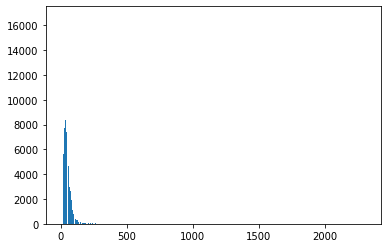

In [0]:
import matplotlib.pyplot as plt
length = pd.value_counts(train_data['url'].str.len(), sort=False)
length = length.sort_index()
plt.bar(length.index,length.values)

<BarContainer object of 200 artists>

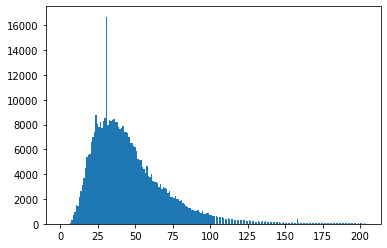

In [0]:
plt.bar(length.index[:200],length.values[:200])

# Encoding URL

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

texts = train_data['url']
labels = train_data['label'] 

tk = Tokenizer(char_level=True,oov_token='UNK',filters='')
#tk = Tokenizer(num_words=128,char_level=True,oov_token='UNK',filters='')
#tk = Tokenizer(oov_token='UNK',filters='./')

tk.fit_on_texts(texts)
data = tk.texts_to_sequences(texts)
print(data[0])
print(texts[0])
#data = pad_sequences(sequences, maxlen=50, padding='post')
#print(data[0])

Using TensorFlow backend.


[16, 5, 4, 10, 23, 3, 22, 4, 20, 4, 12, 2, 4, 16, 16, 5, 8, 7, 14, 8, 3, 12]
diaryofagameaddict.com


In [0]:
print(tk.word_index)

{'UNK': 1, 'e': 2, 'o': 3, 'a': 4, 'i': 5, '/': 6, 't': 7, 'c': 8, 's': 9, 'r': 10, 'n': 11, 'm': 12, 'l': 13, '.': 14, '-': 15, 'd': 16, 'p': 17, 'h': 18, 'u': 19, 'g': 20, 'b': 21, 'f': 22, 'y': 23, 'w': 24, '0': 25, '1': 26, 'k': 27, '2': 28, '_': 29, 'v': 30, '3': 31, '4': 32, '9': 33, '5': 34, '8': 35, '6': 36, '7': 37, 'x': 38, '=': 39, 'j': 40, 'z': 41, '?': 42, 'q': 43, '&': 44, '%': 45, '+': 46, ';': 47, ':': 48, '(': 49, ')': 50, '~': 51, '@': 52, '\\': 53, "'": 54, ',': 55, ' ': 56, '!': 57, '#': 58, 'é': 59, '>': 60, '<': 61, '|': 62, '$': 63, '\u200a': 64, '*': 65, ']': 66, '[': 67, '}': 68, '{': 69, '–': 70, 'è': 71, '¿': 72, '½': 73, 'ç': 74, '’': 75, 'ï': 76, '`': 77, 'ã': 78, 'â': 79, 'ô': 80, '^': 81, 'י': 82, 'ó': 83, '®': 84, 'š': 85, 'à': 86, '”': 87, '“': 88, '©': 89, 'á': 90, 'í': 91, '\xad': 92, '§': 93, 'î': 94, '‚': 95, 'ö': 96, 'ר': 97, 'ו': 98, 'ן': 99, 'ב': 100, '×': 101, 'æ': 102, 'ü': 103, 'ƒ': 104, 'ñ': 105, '¨': 106, '¹': 107, 'å': 108, '¤': 109, '\x13'

In [0]:
character = [i for i in tk.word_index]

In [0]:
#character

# Split Data

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(data, labels, test_size=0.2, shuffle= True,random_state=2020)
x_valid, x_test, y_valid, y_test = train_test_split(x_valid, y_valid, test_size=0.5, shuffle= True,random_state=2020)

# Model Setting

In [0]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb
from keras.layers.normalization import BatchNormalization


# Embedding
max_features = 256
maxlen = 200
embedding_size = 32

# Convolution
kernel_size = 7
filters = 256
pool_size = 3

# LSTM
lstm_output_size = 70

# Training
batch_size = 1024
epochs = 10


print(len(x_train), 'train sequences')
print(len(x_valid), 'valid sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen, padding='post')
x_valid = sequence.pad_sequences(x_valid, maxlen=maxlen, padding='post')
x_test = sequence.pad_sequences(x_test, maxlen=maxlen, padding='post')
print('x_train shape:', x_train.shape)
print('x_valid shape:', x_valid.shape)
print('x_test shape:', x_test.shape)

print('Build model...')



336371 train sequences
42046 valid sequences
Pad sequences (samples x time)
x_train shape: (336371, 200)
x_valid shape: (42046, 200)
x_test shape: (42047, 200)
Build model...


In [0]:
def model_selection(model_type):
  model = Sequential()
  model.add(Embedding(max_features, embedding_size, input_length=maxlen))

  model.add(Conv1D(filters,kernel_size,padding='valid',activation='relu',strides=1))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=pool_size))
  model.add(Dropout(0.5))

  if model_type == "LSTM":
    model.add(LSTM(64))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
  else:
    model.add(Flatten())
    model.add(Dense(256,activation='sigmoid'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()
  return model

In [0]:
%%time
print('Train...')
model_NN = model_selection("NN")
history_dnn = model_NN.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid))

Train...





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           8192      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 194, 256)          57600     
_________________________________________________________________
batch_normalization_1 (Batch (None, 194, 256)          1024      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 64, 256)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 256)           0         
___________________________

In [0]:
%%time
print('Train...')
model_LSTM = model_selection("LSTM")
history_lstm = model_LSTM.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid))

Train...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 32)           8192      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 194, 256)          57600     
_________________________________________________________________
batch_normalization_3 (Batch (None, 194, 256)          1024      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 64, 256)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                82176     
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)      

In [0]:
score, acc = model_LSTM.evaluate(x_valid, y_valid, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

NameError: ignored

# predict

In [0]:
y_pred_NN = model_NN.predict(x_test)
y_pred_LSTN = model_LSTM.predict(x_test)

In [0]:
y_pred_LSTM = [1 if i > 0.5  else 0 for i in y_pred_LSTM ]
y_pred_NN = [1 if i > 0.5  else 0 for i in y_pred_NN ]


# Print Learning Curve

In [0]:
import matplotlib.pyplot as plt
def learning_curve(model_history,model_name):
  plt.plot(model_history.history['acc'])
  plt.plot(model_history.history['val_acc'])
  plt.title(model_name + ' model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(model_history.history['loss'])
  plt.plot(model_history.history['val_loss'])
  plt.title(model_name + ' model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()

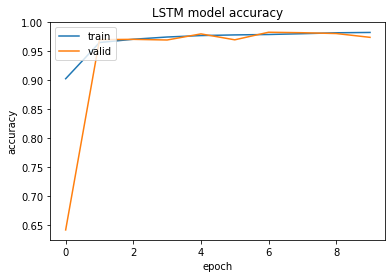

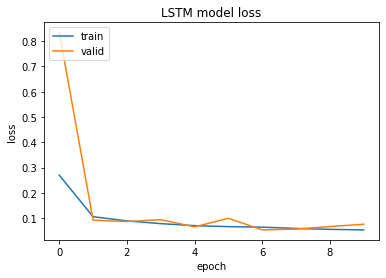

In [0]:
learning_curve(history_lstm,"LSTM")

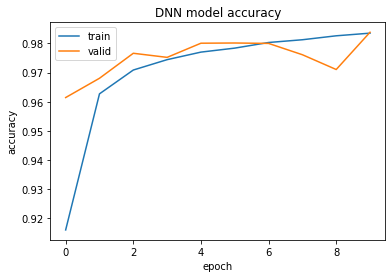

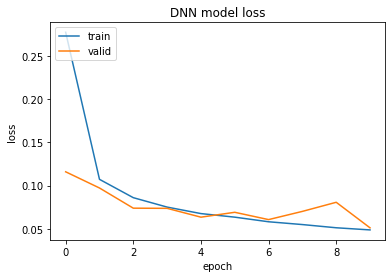

In [0]:
learning_curve(history_dnn,"DNN")

# Word embedding visualization

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

We will now write the weights to disk. To use the [Embedding Projector](http://projector.tensorflow.org), we will upload two files in tab separated format: a file of vectors (containing the embedding), and a file of meta data (containing the words).

In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for num, word in enumerate(character):
  vec = weights[num+1] # skip 0, it's padding.
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

# confusion matrix

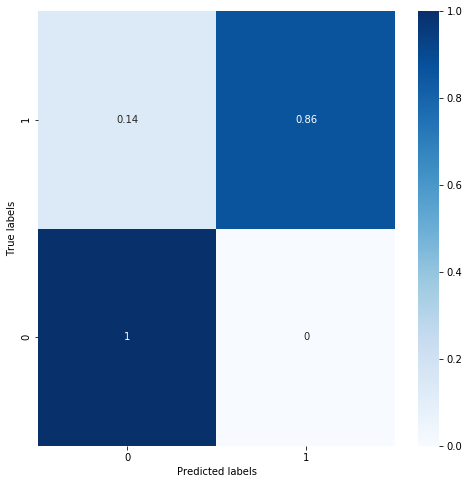

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

con_mat = confusion_matrix(y_test, y_pred_LSTM)

con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]     
con_mat_norm = np.around(con_mat_norm, decimals=2)

# === plot ===
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')

plt.ylim(0, 2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

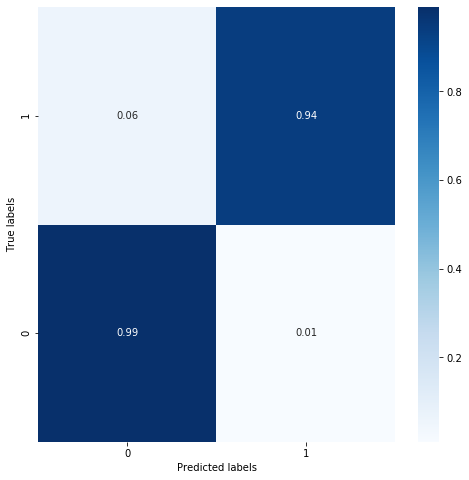

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

con_mat = confusion_matrix(y_test, y_pred_NN)

con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]     
con_mat_norm = np.around(con_mat_norm, decimals=2)

# === plot ===
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')

plt.ylim(0, 2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## ROC curve

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_keras = model.predict(x_test).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras,tpr_keras)

In [0]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Test (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# PR curve

In [0]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_keras)

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.title('PR curve')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()